In [80]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load candidate edges scores.

In [81]:
candEdgesScores = pd.read_csv("edgesScoresRandom.txt", sep= '\t', usecols= [0,1,2,7,8],
                              names= ['source', 'target', 'node2vecScore', 'gainScore', 'expGainScore'], header = 0)
#candEdgesScores.head()

In [82]:
candEdgesDist = pd.read_csv("edgesDistancesRandomSources.txt", sep= "\t")
#candEdgesDist.head()

In [83]:
candEdgesScores = candEdgesScores.join(candEdgesDist.set_index(['source', 'target']), on= ['source', 'target'])
#candEdgesScores.head()

### Describe candidate edges.

In [115]:
#candEdgesScores.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [85]:
#candEdgesScores.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['distance']

### Load nodes' quality characteristics.

In [86]:
nodes = pd.read_csv('nodeQualityFeatures.txt', sep= '\t')
#nodes.head()

### Describe nodes.

In [109]:
#nodes.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

### Load selected targets for node2vec, maxGain, maxExpGain.

In [88]:
policies = ['Node2vec', "Gain", 'ExpGain', 'Random']
selectedEdges = dict()
for policy in policies:
    # Read selected edges scores, distances and join tables.
    eScores = pd.read_csv("edgesSelectedBy%sRandomSources.txt" %policy, sep= '\t', usecols= [0,1,2,7,8],
                          names= ['source', 'target', 'node2vecScore', 'gainScore', 'expGainScore'], header = 0 )
    eDist = pd.read_csv("selectedEdgesBy%sRandomSourcesDistances.txt" %policy, sep= '\t')
    selectedEdges[policy] = eScores.join(eDist.set_index(['source', 'target']), on= ['source', 'target'])

### Drop outliers.

#### For node2vec

<IPython.core.display.Javascript object>


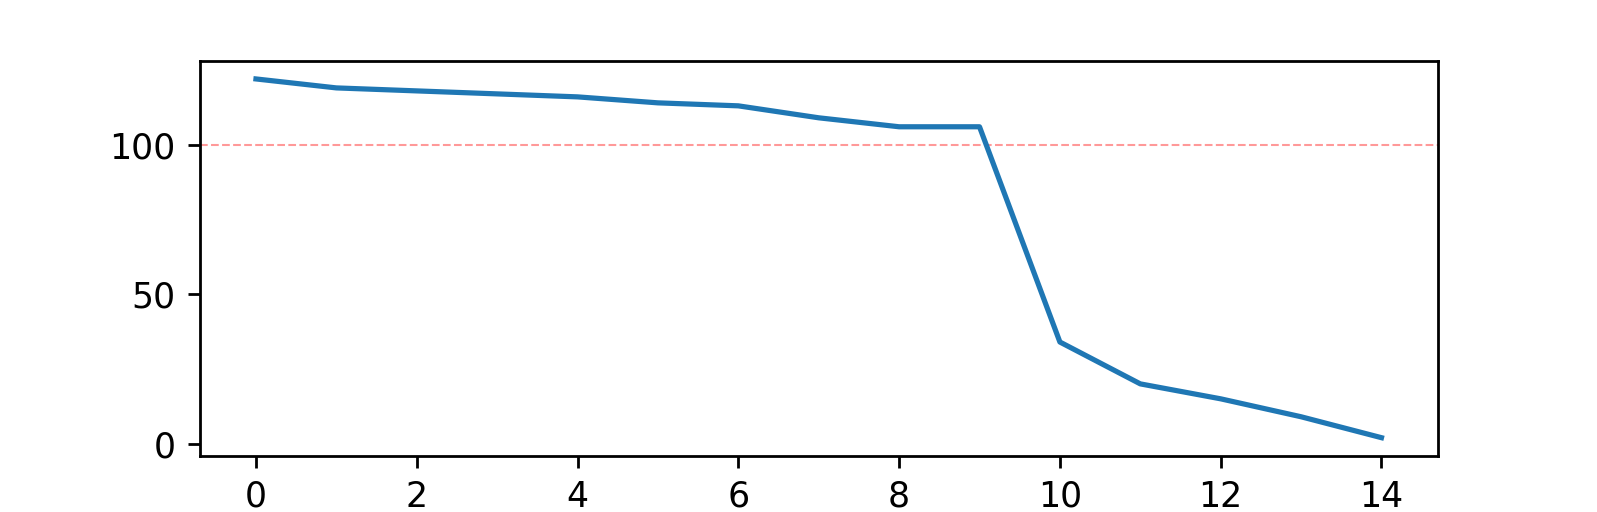

In [90]:
temp = selectedEdges['Node2vec']['target'].value_counts()
temp1 = temp.to_numpy()
plt.axhline(y= 100, color= 'r', linestyle= '--', alpha= 0.4, linewidth= 0.6)
plt.plot(np.arange(temp1.size),temp1)

In [91]:
selectedEdges['Node2vec'] = selectedEdges['Node2vec'][selectedEdges['Node2vec']['target'].isin(temp[temp > 100].index[:] ) ]

#### For maximum gain.

<IPython.core.display.Javascript object>


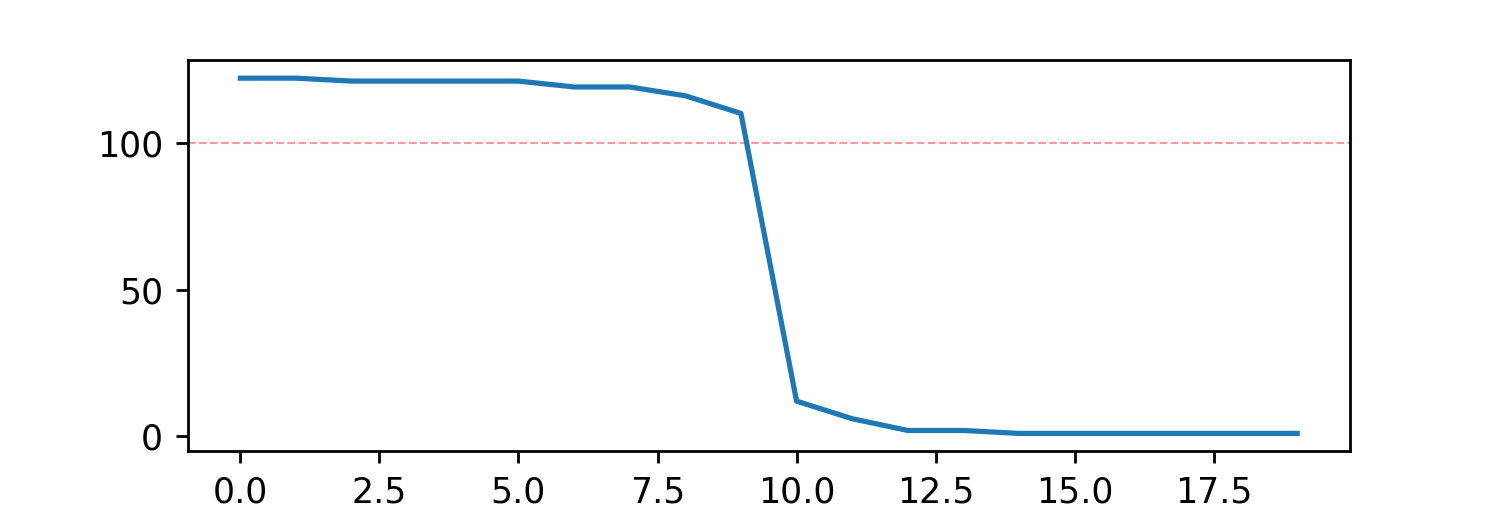

In [92]:
temp = selectedEdges['Gain']['target'].value_counts()
temp1 = temp.to_numpy()
plt.axhline(y= 100, color= 'r', linestyle= '--', alpha= 0.4, linewidth= 0.6)
plt.plot(np.arange(temp1.size),temp1)

In [93]:
selectedEdges['Gain'] = selectedEdges['Gain'][selectedEdges['Gain']['target'].isin(temp[temp > 100].index[:] ) ]

#### For maximum expected gain.

<IPython.core.display.Javascript object>


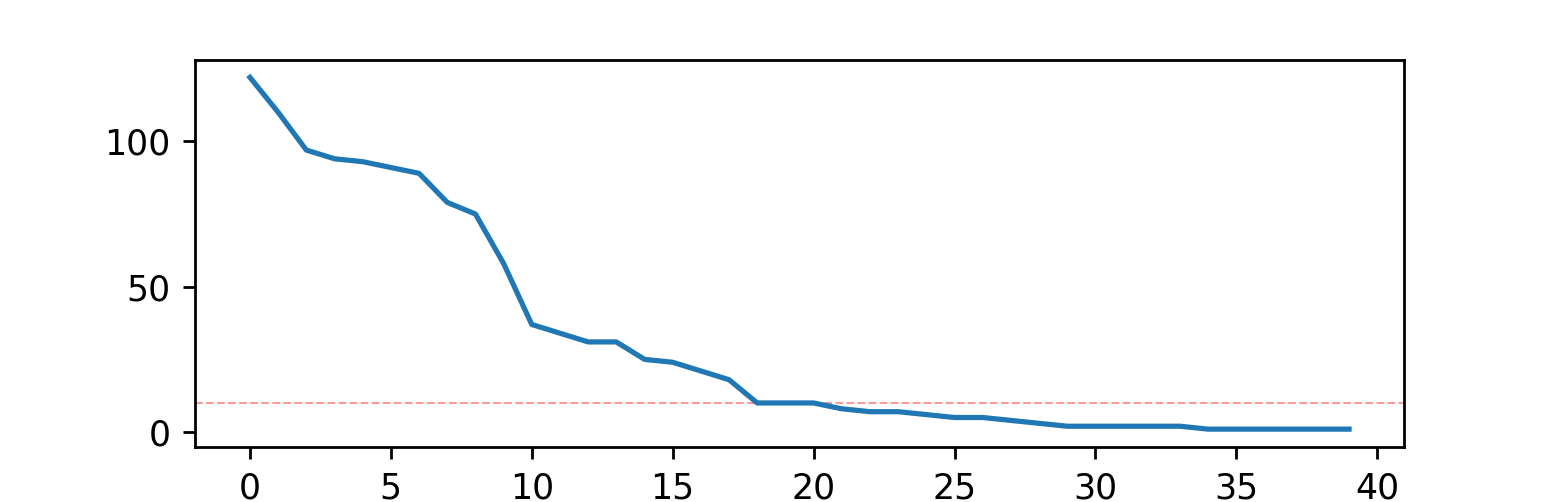

In [94]:
temp = selectedEdges['ExpGain']['target'].value_counts()
temp1 = temp.to_numpy()
plt.axhline(y= 10, color= 'r', linestyle= '--', alpha= 0.4, linewidth= 0.6)
plt.plot(np.arange(temp1.size),temp1)

In [95]:
selectedEdges['ExpGain'] = selectedEdges['ExpGain'][selectedEdges['ExpGain']['target'].isin(temp[temp > 10].index[:] ) ]

### Describe selected edges.

#### Node2vec.

In [96]:
#selectedEdges['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Gain.

In [97]:
#selectedEdges['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Expected gain.

In [98]:
#selectedEdges['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Random.

In [99]:
#selectedEdges['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

### Describe target nodes.

In [100]:
targetNodes = dict()
for policy in policies:
    targetNodes[policy] = nodes[nodes['nodeId'].isin(selectedEdges[policy]['target']) ]

#### Node2vec.

In [101]:
#targetNodes['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Gain.

In [102]:
#targetNodes['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Expected Gain.

In [103]:
#targetNodes['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [104]:
#targetNodes['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

### Results.

In [111]:
print("----------------Distances---------------:")
edgeDistances = {'candidate': candEdgesScores.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['distance'],
      'Random': selectedEdges['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['distance'],
      'Node2vec': selectedEdges['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['distance'],
      'Gain': selectedEdges['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['distance'],
      'ExpGain': selectedEdges['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['distance']
      }
edgeDistances = pd.DataFrame(edgeDistances)
edgeDistances

----------------Distances---------------:


,candidate,Random,Node2vec,Gain,ExpGain
count,147495.000000,1220.000000,1140.000000,1192.000000,1129.000000
mean,2.817350,2.809016,2.313158,3.745805,2.644818
std,0.761287,0.814401,0.620970,0.940719,0.726019
min,1.000000,1.000000,1.000000,2.000000,1.000000
10%,2.000000,2.000000,2.000000,3.000000,2.000000
20%,2.000000,2.000000,2.000000,3.000000,2.000000
30%,2.000000,2.000000,2.000000,3.000000,2.000000
40%,3.000000,3.000000,2.000000,3.000000,2.000000
50%,3.000000,3.000000,2.000000,4.000000,3.000000
60%,3.000000,3.000000,2.000000,4.000000,3.000000


In [114]:
print("----------------Gain Score---------------:")

edgeGain = {'candidate': candEdgesScores.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['gainScore'],
      'Random': selectedEdges['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['gainScore'],
      'Node2vec': selectedEdges['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['gainScore'],
      'Gain': selectedEdges['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['gainScore'],
      'ExpGain': selectedEdges['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['gainScore']
      }
edgeGain = pd.DataFrame(edgeGain)
edgeGain

----------------Gain Score---------------:


,candidate,Random,Node2vec,Gain,ExpGain
count,147495.000000,1220.000000,1140.000000,1192.000000,1129.000000
mean,0.000029,0.000024,0.000019,0.000450,0.000352
std,0.000550,0.000545,0.000460,0.000869,0.000661
min,-0.006126,-0.003618,-0.003217,0.000002,0.000001
10%,-0.000237,-0.000236,-0.000154,0.000023,0.000019
20%,-0.000071,-0.000066,-0.000048,0.000040,0.000032
30%,-0.000028,-0.000027,-0.000024,0.000066,0.000048
40%,-0.000006,-0.000005,-0.000007,0.000084,0.000072
50%,0.000002,0.000002,0.000002,0.000202,0.000138
60%,0.000020,0.000018,0.000015,0.000313,0.000236


In [120]:
print("----------------In Degree---------------:")

edgeInDegrees = {
    'Candidate': nodes.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['inDegree'],
    'Random': targetNodes['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['inDegree'],
    'Node2vec': targetNodes['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['inDegree'],
    'Gain': targetNodes['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['inDegree'],
    'ExpGain': targetNodes['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['inDegree']
}
edgeInDegrees = pd.DataFrame(edgeInDegrees)
edgeInDegrees

----------------In Degree---------------:


,Candidate,Random,Node2vec,Gain,ExpGain
count,1222.000000,765.000000,10.000000,10.000000,18.000000
mean,13.680033,13.588235,88.700000,1.700000,35.222222
std,22.308387,21.517717,59.159014,4.029061,31.266512
min,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,38.700000,0.000000,0.000000
20%,1.000000,1.000000,48.600000,0.000000,0.800000
30%,2.000000,2.000000,61.200000,0.000000,5.800000
40%,3.000000,3.000000,73.800000,0.000000,17.000000
50%,5.000000,5.000000,83.500000,0.000000,28.500000
60%,8.000000,9.000000,90.400000,0.400000,56.000000


In [124]:
print("----------------Out Degree---------------:")

edgeOutDegrees = {
    'Candidate': nodes.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['outDegree'],
    'Random': targetNodes['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['outDegree'],
    'Node2vec': targetNodes['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['outDegree'],
    'Gain': targetNodes['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['outDegree'],
    'ExpGain': targetNodes['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['outDegree']
}
edgeOutDegrees = pd.DataFrame(edgeOutDegrees)
edgeOutDegrees

----------------Out Degree---------------:


,Candidate,Random,Node2vec,Gain,ExpGain
count,1222.000000,765.000000,10.000000,10.000000,18.000000
mean,13.680033,14.184314,76.900000,1.300000,41.222222
std,23.916828,26.180130,74.640546,0.483046,69.930685
min,0.000000,0.000000,8.000000,1.000000,1.000000
10%,0.000000,0.000000,23.300000,1.000000,1.000000
20%,1.000000,1.000000,25.800000,1.000000,1.000000
30%,1.000000,1.000000,33.700000,1.000000,2.000000
40%,2.000000,2.000000,44.800000,1.000000,2.000000
50%,4.000000,4.000000,60.000000,1.000000,17.500000
60%,7.000000,7.400000,70.400000,1.000000,22.000000


In [121]:
print("----------------Pagerank---------------:")

targetPagerank = {
    'Candidate': nodes.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['pagerank'],
    'Random': targetNodes['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['pagerank'],
    'Node2vec': targetNodes['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['pagerank'],
    'Gain': targetNodes['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['pagerank'],
    'ExpGain': targetNodes['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['pagerank']
}
targetPagerank = pd.DataFrame(targetPagerank)
targetPagerank

----------------Pagerank---------------:


,Candidate,Random,Node2vec,Gain,ExpGain
count,1222.000000,765.000000,10.000000,10.000000,18.000000
mean,0.000818,0.000791,0.004645,0.000284,0.001404
std,0.002225,0.002062,0.002701,0.000106,0.001404
min,0.000243,0.000243,0.000243,0.000243,0.000243
10%,0.000243,0.000243,0.001864,0.000243,0.000243
20%,0.000250,0.000250,0.002491,0.000243,0.000250
30%,0.000265,0.000266,0.003569,0.000243,0.000534
40%,0.000289,0.000292,0.004383,0.000243,0.000838
50%,0.000331,0.000331,0.004722,0.000243,0.001271
60%,0.000404,0.000402,0.005143,0.000249,0.001379


In [122]:
print("----------------Red Pagerank---------------:")

targetRedPagerank = {
    'Candidate': nodes.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redPagerank'],
    'Random': targetNodes['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redPagerank'],
    'Node2vec': targetNodes['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redPagerank'],
    'Gain': targetNodes['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redPagerank'],
    'ExpGain': targetNodes['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redPagerank']
}
targetRedPagerank = pd.DataFrame(targetRedPagerank)
targetRedPagerank

----------------Red Pagerank---------------:


,Candidate,Random,Node2vec,Gain,ExpGain
count,1222.000000,765.000000,10.000000,10.000000,18.000000
mean,0.332798,0.328954,0.323023,0.622608,0.561188
std,0.164824,0.164405,0.140480,0.006460,0.047647
min,0.000000,0.000000,0.161032,0.615104,0.490224
10%,0.149289,0.149344,0.163151,0.618413,0.511740
20%,0.158458,0.158405,0.169762,0.619517,0.519254
30%,0.172811,0.172847,0.263759,0.619806,0.524130
40%,0.204379,0.204379,0.305237,0.620531,0.530376
50%,0.282878,0.282878,0.313908,0.620985,0.555863
60%,0.432878,0.423129,0.323959,0.621168,0.570028


In [123]:
print("----------------Red Neighbors Out Ratio---------------:")

targetRedOutRatio = {
    'Candidate': nodes.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsOutRatio'],
    'Random': targetNodes['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsOutRatio'],
    'Node2vec': targetNodes['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsOutRatio'],
    'Gain': targetNodes['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsOutRatio'],
    'ExpGain': targetNodes['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsOutRatio']
}
targetRedOutRatio = pd.DataFrame(targetRedOutRatio)
targetRedOutRatio

----------------Red Neighbors Out Ratio---------------:


,Candidate,Random,Node2vec,Gain,ExpGain
count,1222.000000,765.000000,10.000000,10.0,18.000000
mean,0.432953,0.427127,0.277833,1.0,0.952916
std,0.419469,0.418462,0.378486,0.0,0.057653
min,0.000000,0.000000,0.000000,1.0,0.834951
10%,0.000000,0.000000,0.000000,1.0,0.857509
20%,0.000000,0.000000,0.003101,1.0,0.909231
30%,0.000000,0.000000,0.020210,1.0,0.938988
40%,0.024510,0.020343,0.034261,1.0,0.956191
50%,0.500000,0.500000,0.099480,1.0,0.970612
60%,0.500000,0.500000,0.171676,1.0,1.000000


In [126]:
print("----------------Red Neighbors In Ratio---------------:")

targetRedInRatio = {
    'Candidate': nodes.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsInRatio'],
    'Random': targetNodes['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsInRatio'],
    'Node2vec': targetNodes['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsInRatio'],
    'Gain': targetNodes['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsInRatio'],
    'ExpGain': targetNodes['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['redNeighborsInRatio']
}
targetRedInRatio = pd.DataFrame(targetRedInRatio)
targetRedInRatio

----------------Red Neighbors In Ratio---------------:


,Candidate,Random,Node2vec,Gain,ExpGain
count,1222.000000,765.000000,10.000000,10.000000,18.000000
mean,0.518632,0.510423,0.709222,0.700000,0.883832
std,0.425197,0.427298,0.338252,0.258199,0.211346
min,0.000000,0.000000,0.069767,0.500000,0.500000
10%,0.000000,0.000000,0.297602,0.500000,0.500000
20%,0.000000,0.000000,0.448583,0.500000,0.687097
30%,0.094277,0.077225,0.494000,0.500000,0.975364
40%,0.333333,0.285714,0.700000,0.500000,0.984356
50%,0.500000,0.500000,0.899621,0.500000,1.000000
60%,0.746774,0.666667,0.967641,0.700000,1.000000


### Unique targets by policy.

In [135]:
policiesB = ['Node2vec', 'ResourceAllocation', 'PreferencialAttachment', 'JaccardCoefficient', 'Gain', 'ExpGain', 
           'AdamicAdar', 'Random']
selEdgesB = dict()
uniqueNodes = dict()
for policy in policiesB:
    selEdgesB[policy] = pd.read_csv("selectedEdgesBy%sRandomSourcesDistances.txt" %policy, sep= '\t')
    uniqueNodes[policy] = selEdgesB[policy]['target'].nunique()
uniqueNodes

{'Node2vec': 15,
 'ResourceAllocation': 351,
 'PreferencialAttachment': 17,
 'JaccardCoefficient': 662,
 'Gain': 20,
 'ExpGain': 40,
 'AdamicAdar': 315,
 'Random': 765}